# Sampling from specified functions.
## Joseph Palmer: jpalmer18@imperial.ac.uk
### Royal Holloway University of London
### Imperial College London
### May 2019
---

The method to sample from a function is as follows:

First sample from a uniform distribution bound from 0 to 1.
Pass the numbers into the inverse of the CDF of the target distribution.
The output numbers satisfy the distribution of the original function.

The following example uses an exponential distribution:

$f(x) = \lambda e^{-\lambda x}$. 

The cumulative density function is:

$P(x) = 1 - e^{-\lambda x}$.

The Inverse of this is:

$P(x)^{-1} = -\ln{1 - \lambda x}$

Resources: 

https://sciencehouse.wordpress.com/2015/06/20/sampling-from-a-probability-distribution/
https://blogs.sas.com/content/iml/2013/07/22/the-inverse-cdf-method.html
https://www.symbolab.com/solver/function-inverse-https://www.wolframalpha.com/widgets/view.jsp?id=d08726019e4a2a15cb1d49092e4d0522

In [56]:
# Imports
import pandas as pd
import numpy as np
from mletools import runmle
import mletools
import matplotlib.pyplot as plt

# Load data into pandas dataframe and subset by locations
path = "~/Documents/CMEE/CMEECourseWork/Miniproject/Data/Distances.csv"
data = pd.read_csv(path)
rural_dist = data["Distance_Km"][data["Location"] == "ROT"]
urban_dist = data["Distance_Km"][data["Location"] == "ZSL"]

In [75]:
# testing function - exponential -
def InvExpCDF(params, x):
    rate = 1 / params[0]
    return - np.log(1 - rate) / x


      fun: 3235.903830443058
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([-9.09494702e-05])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 12
      nit: 3
   status: 0
  success: True
        x: array([0.10689546])

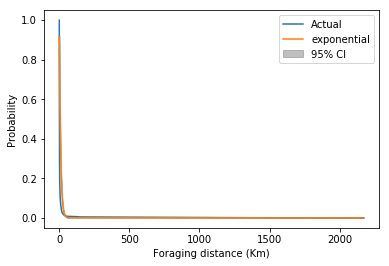

In [78]:
# sample from uniform distribution to input into functions
n = 1000
sample = np.random.uniform(0, 1, n)

newdata = InvExpCDF([1.8], sample)

#newdata = np.random.exponential(1/1.8, n)
#print(newdata)


mod = runmle(data = newdata, startest = [0.1], method = "exponential")

model = mod.ModelData()

pred = mod.MLEPredict(model)
cis = mod.Getci2p(model)
pred2 = mod.MLEPredictCI(cis, pred)
fig = mod.PredictFig(pred2)


model

